In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
import tensorflow as tf

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = "/Users/dylankennedy/Library/Mobile Documents/com~apple~CloudDocs/Documents/ITMLA3/cell_images",
    validation_split = 0.2,
    subset = 'training',
    shuffle = True,
    seed = 111,
    image_size = (256, 256),
    batch_size = 32)

Found 27558 files belonging to 2 classes.
Using 22047 files for training.


In [4]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    directory = "/Users/dylankennedy/Library/Mobile Documents/com~apple~CloudDocs/Documents/ITMLA3/cell_images",
    validation_split = 0.2,
    subset = 'validation',
    shuffle = True,
    seed = 111,
    image_size = (256, 256),
    batch_size = 32)

Found 27558 files belonging to 2 classes.
Using 5511 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['Parasitized', 'Uninfected']


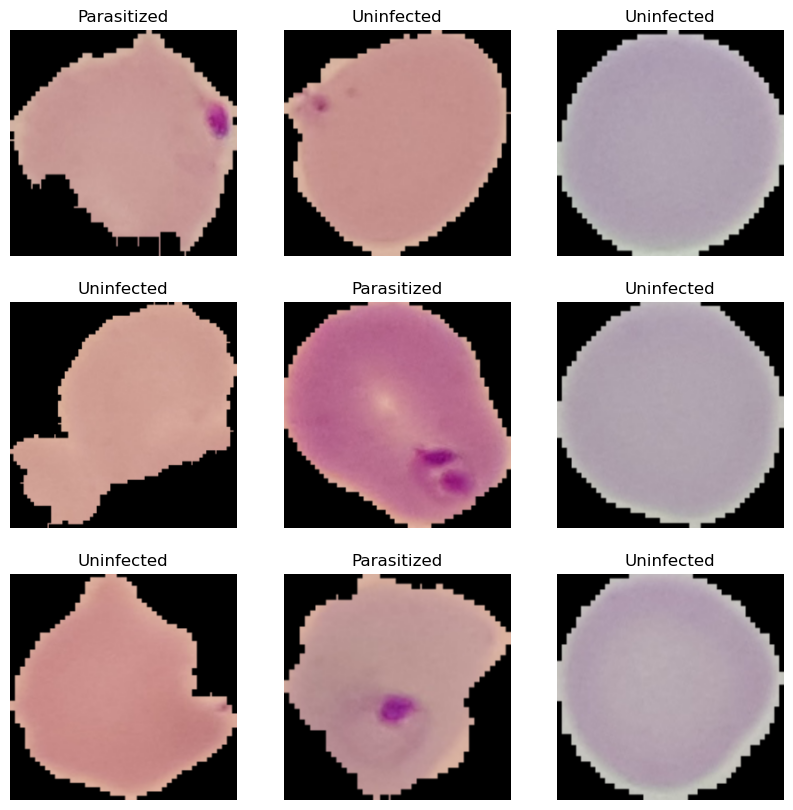

In [6]:
plt.figure(figsize=(10, 10))
for images, lables in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot( 3, 3, i +1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[lables[i]])
        plt.axis('off')

In [7]:
for image_batch, lables_batch in train_ds:
    print(image_batch.shape)
    print(lables_batch.shape)
    break

(32, 256, 256, 3)
(32,)


In [8]:
from keras import layers

In [9]:
normalization_layer = layers.Rescaling(1./255)

In [10]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, lables_batch = next(iter(normalized_ds))
first_image = image_batch[0]

print(np.min(first_image), np.max(first_image))

0.0 0.8813925


<h2> Model Buiding</h2>

In [11]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [12]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))

In [13]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [14]:
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 127, 127, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 32)        0

<h2>Model Training</h2>

In [16]:
epochs = 50
history = model.fit(train_ds, validation_data = val_ds, epochs = epochs, callbacks = [early_stopping])

Epoch 1/50
689/689 [==============================] - 220s 318ms/step - loss: 16.5777 - accuracy: 0.5299 - val_loss: 0.9076 - val_accuracy: 0.5543
Epoch 2/50
689/689 [==============================] - 230s 333ms/step - loss: 2.1722 - accuracy: 0.5696 - val_loss: 0.7127 - val_accuracy: 0.5447
Epoch 3/50
689/689 [==============================] - 234s 340ms/step - loss: 1.0248 - accuracy: 0.5754 - val_loss: 0.6908 - val_accuracy: 0.5444
Epoch 4/50
689/689 [==============================] - 235s 341ms/step - loss: 0.7854 - accuracy: 0.5938 - val_loss: 0.6854 - val_accuracy: 0.5396
Epoch 5/50
689/689 [==============================] - 234s 339ms/step - loss: 0.7170 - accuracy: 0.6099 - val_loss: 0.6845 - val_accuracy: 0.5337
Epoch 6/50
689/689 [==============================] - 236s 342ms/step - loss: 0.6665 - accuracy: 0.6374 - val_loss: 0.6836 - val_accuracy: 0.5291
Epoch 7/50
689/689 [==============================] - 236s 343ms/step - loss: 0.6312 - accuracy: 0.6657 - val_loss: 0.6799 

<h2>Plotting Loss and Accuracy Curves</h2>

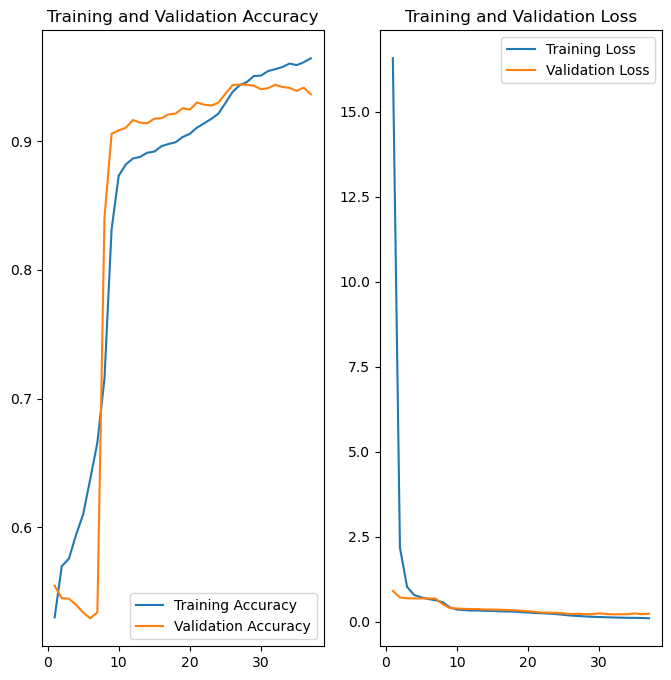

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc='lower right')  # Corrected legend location
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc='upper right')  # Corrected legend location
plt.title("Training and Validation Loss")
plt.show()
